Title: Forecasting Sleep Efficiency with a Machine Learning-Based Analysis of Lifestyle and
Sleep Behavior Data

# Data Preprocessing

In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\richa\\Downloads\\Sleep_Efficiency.csv")

df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [3]:
df.shape

(452, 15)

## Label coding: replace Male with 1 and Female with 0

In [4]:
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


## Replace Smoking status to binary: Yes = 1, No = 0

In [5]:
df["Smoking status"] = df["Smoking status"].replace({"Yes": 1, "No": 0})

df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    int64  
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    int64  
 14  Exercise frequency      446 non-null    fl

# Checking for any missing values

In [7]:
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

From the result above, we can see that there is a few missing values in Awakenings, Cafeeine consumption, and Alcohol consumption

In [8]:
df_drop = df.dropna()

df_drop.shape

(388, 15)

If we drop all the row that contains NaN values, we will left off with 388 rows, which means 64 rows were deleted.

That is nearly 15% of the data. We think it is too much, so we will use other strategies to fill out the missing values

## Fill in the missing values for Awakenings by its mode 

In [9]:
Awakenings_mode = df["Awakenings"].mode()[0]

print(Awakenings_mode)

1.0


In [10]:
import numpy as np

df["Awakenings"] = df["Awakenings"].fillna(Awakenings_mode)

In [11]:
df["Awakenings"].isna().sum()

0

## Fill in the missing values for Caffeine consumption according to adult and non-adult 

In [12]:
df["Caffeine consumption"].value_counts()

Caffeine consumption
0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: count, dtype: int64

In [13]:
df["Age"].min()

9

In [14]:
df["Age"].max()

69

Making adult and non-adult group by

Being 17 or under: non-adult

Over 17: adult

In [15]:
df_non_adult = df[df["Age"] <= 17]

df_non_adult.shape

(9, 15)

In [16]:
df_adult = df[df["Age"] > 17]

df_adult.shape

(443, 15)

In [17]:
df_non_adult["Caffeine consumption"].mean()

5.555555555555555

In [18]:
df_adult["Caffeine consumption"].mean()

24.04306220095694

Since the Caffeine consumption attribute is discrete: 0.0, 25.0, 50.0, 75.0, 100.0, and 200.0

The Caffeine consumption for a non-adult group is 14.29, which is more closer to 0.0, so we will replace all the missing value from non-adult group to be 0.0

The Caffeine consumption for an adult group is 23.97, which is more closer to 25.0, so we will replace all the missing value from non-adult group to be 25.0

In [19]:
df_non_adult = df_non_adult.fillna(0.0)

df_adult = df_adult.fillna(25.0)

In [20]:
df.loc[df["Age"] <= 17, :] = df_non_adult
df.loc[df["Age"] > 17, :] = df_adult

In [21]:
df["Caffeine consumption"].isna().sum()

0

## Fill in the missing values for Caffeine consumption according to legal and illegal group

In [22]:
df["Alcohol consumption"].value_counts()

Alcohol consumption
0.0     246
1.0      54
3.0      48
2.0      37
5.0      30
4.0      23
25.0     14
Name: count, dtype: int64

In [23]:
df_illegal = df[df["Age"] <= 20]

df_illegal["Alcohol consumption"].mean()

0.2222222222222222

In [24]:
df_legal = df[df["Age"] > 20]

df_legal["Alcohol consumption"].mean()

1.9815668202764978

Since the Alcohol consumption attribute is discrete here.

The Alcohol consumption for an illegal group is 0.22, which is more closer to 0.0, so we will replace all the missing value from non-adult group to be 0.0

The Alcohol consumption for a legal group is 1.98, which is more closer to 2.0, so we will replace all the missing value from non-adult group to be 2.0

In [25]:
df_illegal = df_illegal.fillna(0.0)

df_legal = df_legal.fillna(25.0)

In [26]:
df["Alcohol consumption"].isna().sum()

0

In [27]:
df.isna().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

Now, we cleaned all the missing values

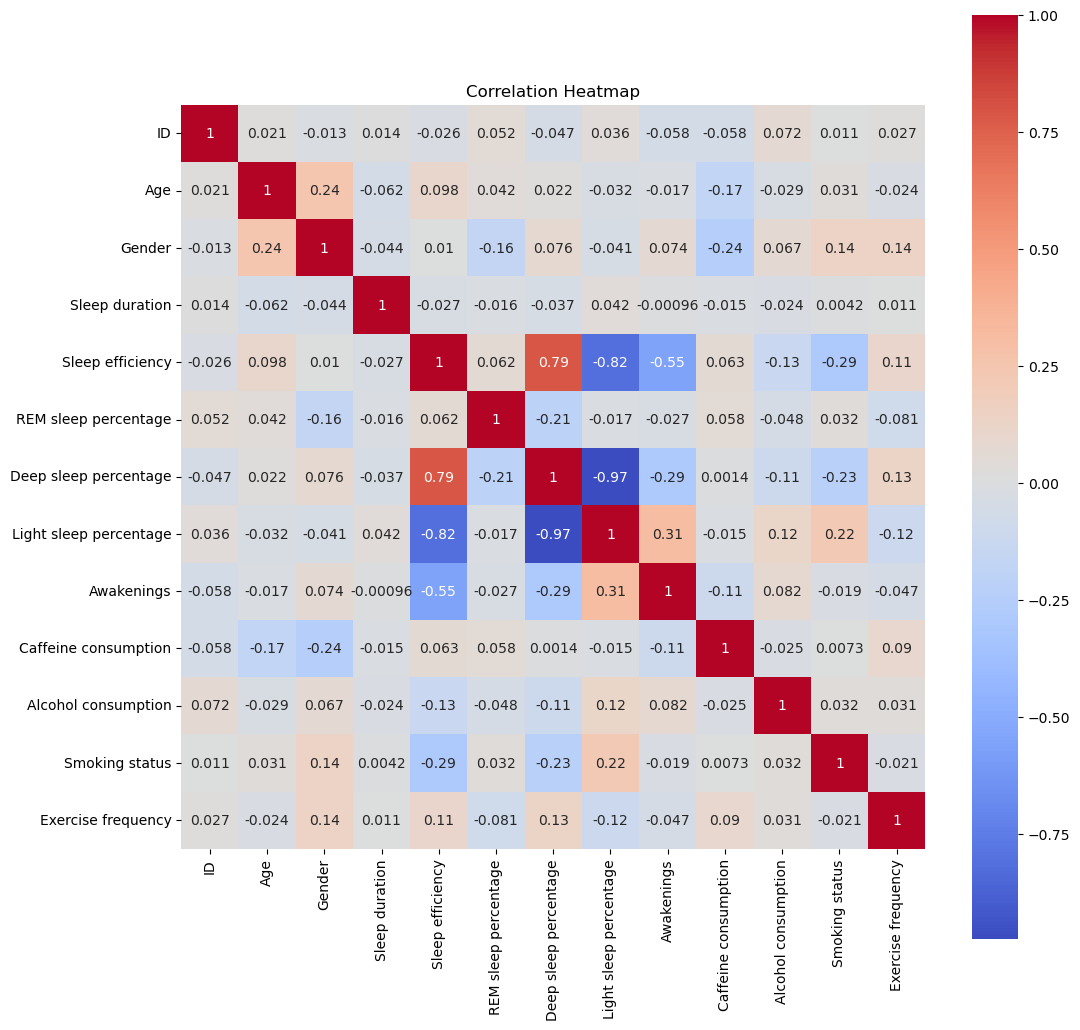

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df_drop = df.drop(columns=["Wakeup time", "Bedtime"])

corr_matrix = df_drop.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

Here, we dropped the Bedtime and Wakeup time columns, and reordered the columns. So, that our predictor moves to the last columns in our dataframe

In [29]:
df_drop.head(2)

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,0,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,1,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0


In [30]:
df_reordered = df_drop.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 4]]

df_reordered.head(2)

,ID,Age,Gender,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep efficiency
0,1,65,0,6.0,18,70,12,0.0,0.0,0.0,1,3.0,0.88
1,2,69,1,7.0,19,28,53,3.0,0.0,3.0,1,3.0,0.66


In [31]:
#df_reordered.to_csv("C:\\Users\\richa\\COMP 542 ML\\data_clean.csv", index=False)

In [32]:
df_clean = pd.read_csv("C:\\Users\\richa\\COMP 542 ML\\data_clean.csv")

df_clean

,ID,Age,Gender,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep efficiency
0,1,65,0,6.0,18,70,12,0.0,0.0,0.0,1,3.0,0.88
1,2,69,1,7.0,19,28,53,3.0,0.0,3.0,1,3.0,0.66
2,3,40,0,8.0,20,70,10,1.0,0.0,0.0,0,3.0,0.89
3,4,40,0,6.0,23,25,52,3.0,50.0,5.0,1,1.0,0.51
4,5,57,1,8.0,27,55,18,3.0,0.0,3.0,0,3.0,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,0,7.5,22,57,21,0.0,0.0,0.0,0,5.0,0.91
448,449,52,1,6.0,28,57,15,4.0,25.0,0.0,0,3.0,0.74
449,450,40,0,8.5,20,32,48,1.0,25.0,3.0,1,0.0,0.55
450,451,45,1,7.0,18,72,10,3.0,0.0,0.0,0,3.0,0.76


In [33]:
df_clean.isna().sum()

ID                        0
Age                       0
Gender                    0
Sleep duration            0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
Sleep efficiency          0
dtype: int64

In [34]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the selected features
selected_features = ["Light sleep percentage", "Awakenings", "Smoking status", "Age", "REM sleep percentage"]

# Subset the data
X_selected = df_clean[selected_features]
y = df_clean["Sleep efficiency"]

# Add a constant for the intercept
X_selected = sm.add_constant(X_selected)

# Define a function to calculate RMSE for cross-validation
def rmse_scorer(model, X, y):
    """
    Custom scorer to calculate RMSE during cross-validation.
    """
    y_pred = model.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

# Use K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize arrays to store RMSE scores
rmse_scores = []

for train_index, test_index in kf.split(X_selected):
    # Split the data into train and test sets
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the OLS model
    model = sm.OLS(y_train, X_train).fit()
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE and store the result
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Print the cross-validated RMSE scores
print("Cross-Validated RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

Cross-Validated RMSE Scores: [0.06279524552215299, 0.05618868891952945, 0.05630519291462062, 0.0664113729257015, 0.06713311923933417]
Mean RMSE: 0.061766723904267753
Standard Deviation of RMSE: 0.004740709128069886


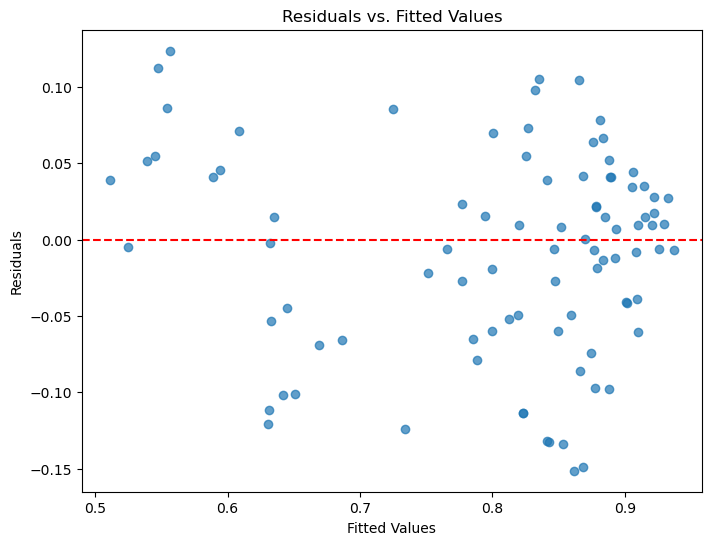

In [35]:
# Residuals vs. Fitted Values
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

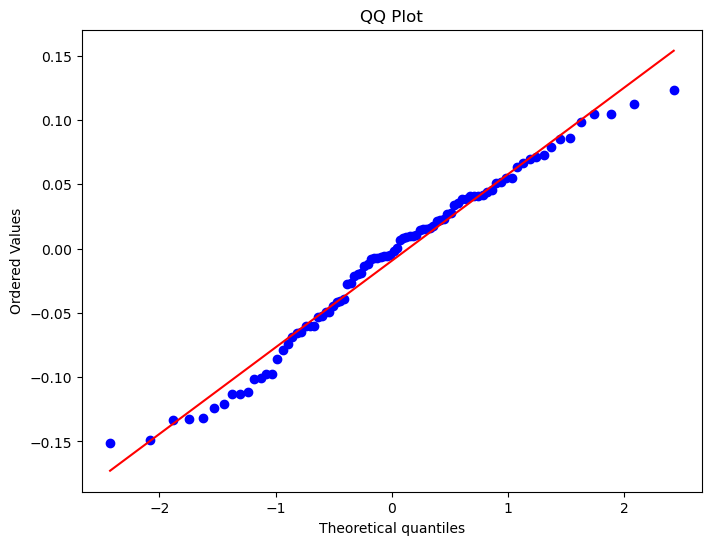

In [36]:
import scipy.stats as stats

# QQ Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

# XGBoost without tuning All Features

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

X = df_clean.drop(columns=["ID", "Sleep efficiency"])  # Drop ID and target variable
y = df_clean["Sleep efficiency"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100,  # Number of trees
    max_depth=5,       
    random_state=42
)

# Use K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with RMSE scoring
rmse_scores = -cross_val_score(
    xgb_regressor, 
    X, y, 
    scoring='neg_root_mean_squared_error',  # Use RMSE as the metric
    cv=kf
)

# Print evaluation metrics
print("Cross-Validated RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

Cross-Validated RMSE Scores: [0.0560599  0.04965774 0.05767903 0.05850347 0.06007498]
Mean RMSE: 0.05639502304907955
Standard Deviation of RMSE: 0.003609420966956061


# XGBoost without tuning with feature selection

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Specify the selected features and target variable
selected_features = ['Light sleep percentage', 'Awakenings', 'Smoking status', 'Deep sleep percentage']
target_variable = 'Sleep efficiency'

X = df_clean[selected_features]  # Use only the selected features
y = df_clean[target_variable]   # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100,  # Number of trees
    max_depth=5,       
    random_state=42
)

# Use K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with RMSE scoring
rmse_scores = -cross_val_score(
    xgb_regressor, 
    X, y, 
    scoring='neg_root_mean_squared_error',  # Use RMSE as the metric
    cv=kf
)

# Print evaluation metrics
print("Cross-Validated RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

Cross-Validated RMSE Scores: [0.06595751 0.05199116 0.06142837 0.06250934 0.06592405]
Mean RMSE: 0.061562087525472375
Standard Deviation of RMSE: 0.0051159429372528206


# XGBoost with tuning

In [44]:
from sklearn.model_selection import GridSearchCV, KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

X = df_clean.drop(columns=["ID", "Sleep efficiency"])  # Drop ID and target variable
y = df_clean["Sleep efficiency"]  # Target variable

# Define the Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],      
    'max_depth': [3, 5, 7],             
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0],            # Subsampling ratio
    'colsample_bytree': [0.8, 1.0],     # Feature sampling ratio
    'gamma': [0, 1, 5],                 # Minimum loss reduction
    'reg_alpha': [0, 0.1, 1],           # L1 regularization term
    'reg_lambda': [1, 1.5, 2]           # L2 regularization term
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define RMSE as the custom scorer
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Define custom CV folds (e.g., 5 folds)
cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with RMSE as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=rmse_scorer,                # Use RMSE as scoring metric
    cv=cv_folds,                        # Use custom CV folds
    verbose=1,                          # Show progress
    n_jobs=-1                           # Use all CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative RMSE):", grid_search.best_score_)  # This will be negative RMSE due to scoring behavior

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model with RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.8}
Best Score (negative RMSE): -0.05066674406856987
Root Mean Squared Error (RMSE): 0.05512189125251898


# XGBoost tuning with selected features

In [41]:
from sklearn.model_selection import GridSearchCV, KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define the selected features and target variable
selected_features = ['Light sleep percentage', 'Awakenings', 'Smoking status', 'Deep sleep percentage']
target_variable = 'Sleep efficiency'


X = df_clean[selected_features]  # Use only the selected features
y = df_clean[target_variable]   # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],      
    'max_depth': [3, 5, 7],             
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0],            # Subsampling ratio
    'colsample_bytree': [0.8, 1.0],     # Feature sampling ratio
    'gamma': [0, 1, 5],                 # Minimum loss reduction
    'reg_alpha': [0, 0.1, 1],           # L1 regularization term
    'reg_lambda': [1, 1.5, 2]           # L2 regularization term
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define RMSE as the custom scorer
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)


cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with RMSE as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=rmse_scorer,                # Use RMSE as scoring metric
    cv=cv_folds,                        # Use custom CV folds
    verbose=1,                          # Show progress
    n_jobs=-1                           # Use all CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative RMSE):", grid_search.best_score_)  # This will be negative RMSE due to scoring behavior

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model with RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.8}
Best Score (negative RMSE): -0.05066674406856987
Root Mean Squared Error (RMSE): 0.05512189125251898


# Lightgbm All features

In [46]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_clean.drop(columns=['Sleep efficiency', 'ID'])  # Drop target and irrelevant identifier
y = df_clean['Sleep efficiency']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
!pip install lightgbm

In [52]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate

scoring = {'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)}


# Initialize the LightGBM Regressor
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

# Define the scoring metric (MSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 5-fold cross-validation
cv_results = cross_validate(lgb_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Convert negative MSE to positive for interpretability
cv_results['test_RMSE'] = -cv_results['test_RMSE']

# Display CV results
print(f"Cross-Validation Mean RMSE: {cv_results['test_RMSE'].mean():.4f}")
print(f"Cross-Validation Std RMSE: {cv_results['test_RMSE'].std():.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 288, number of used features: 11
[LightGBM] [Info] Start training from score 0.789861
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [53]:
# Train the LightGBM model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate on the test set using RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test Set Root Mean Squared Error (RMSE): {test_rmse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 11
[LightGBM] [Info] Start training from score 0.787784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define RMSE as a custom scoring metric
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, -1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb.LGBMRegressor(random_state=42),
    param_grid=param_grid,
    scoring=rmse_scorer,  # Use RMSE as the scoring metric
    cv=5,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")
print(f"Best CV RMSE: {-grid_search.best_score_:.4f}")  # Negate to make RMSE positive


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 11
[LightGBM] [Info] Start training from score 0.787784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

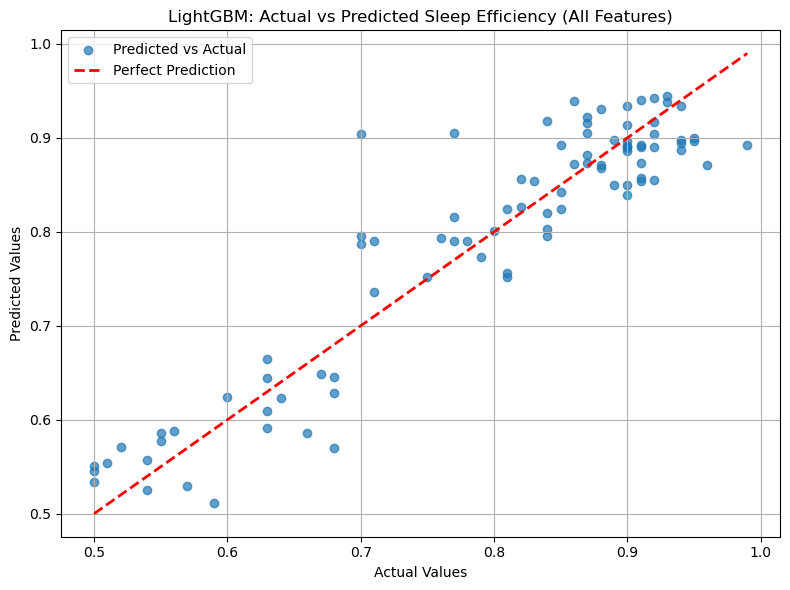

In [53]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('LightGBM: Actual vs Predicted Sleep Efficiency (All Features)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('C:/Users/Brandon/Desktop/org/courses/c542/project/figs/lightgbm_all_features.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


# Lightgbm selected features

In [57]:
# Retain only the selected features and target variable
selected_features = ['Light sleep percentage', 'Awakenings', 'Smoking status', 'Deep sleep percentage']
target_variable = 'Sleep efficiency'

data_selected = df_clean[selected_features + [target_variable]]

# Display basic info and the first few rows
print("Dataset with Selected Features Info:")
data_selected.info()
print("\nFirst few rows of the dataset:")
display(data_selected.head())

Dataset with Selected Features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Light sleep percentage  452 non-null    int64  
 1   Awakenings              452 non-null    float64
 2   Smoking status          452 non-null    int64  
 3   Deep sleep percentage   452 non-null    int64  
 4   Sleep efficiency        452 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 17.8 KB

First few rows of the dataset:


,Light sleep percentage,Awakenings,Smoking status,Deep sleep percentage,Sleep efficiency
0,12,0.0,1,70,0.88
1,53,3.0,1,28,0.66
2,10,1.0,0,70,0.89
3,52,3.0,1,25,0.51
4,18,3.0,0,55,0.76


In [59]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_selected[selected_features]
y = data_selected[target_variable]

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define RMSE as a custom scoring metric
scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Initialize the LightGBM Regressor
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=scorer)

# Convert negative RMSE to positive
cv_scores = -cv_scores

# Display CV results
print(f"Cross-Validation Mean RMSE: {cv_scores.mean():.4f}")
print(f"Cross-Validation Std RMSE: {cv_scores.std():.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 288, number of used features: 4
[LightGBM] [Info] Start training from score 0.789861
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [61]:
# Train the LightGBM model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate on the test set using RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test Set Root Mean Squared Error (RMSE): {test_rmse:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 4
[LightGBM] [Info] Start training from score 0.787784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define RMSE as a custom scoring metric
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, -1]
}

# Initialize GridSearchCV with RMSE scoring
grid_search = GridSearchCV(
    estimator=lgb.LGBMRegressor(random_state=42),
    param_grid=param_grid,
    scoring=rmse_scorer,  # Use RMSE as the scoring metric
    cv=5,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display results
print(f"Best Parameters: {best_params}")
print(f"Best CV RMSE: {-grid_search.best_score_:.4f}")  # Negate the score to display positive RMSE



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 4
[LightGBM] [Info] Start training from score 0.787784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

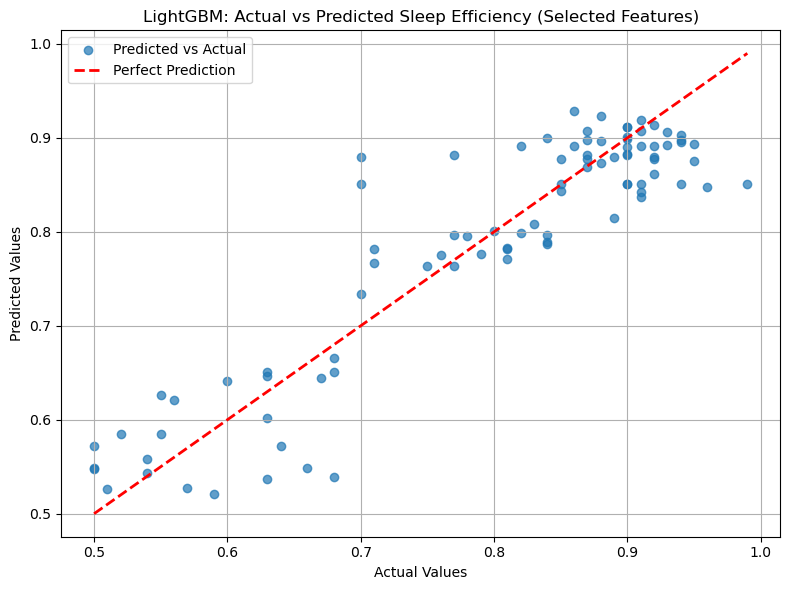

In [63]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('LightGBM: Actual vs Predicted Sleep Efficiency (Selected Features)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('C:/Users/Brandon/Desktop/org/courses/c542/project/figs/lightgbm_selected_features.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


# Random Forest All Features

In [65]:
# Define features (X) and target variable (y)
X = df_clean.drop(columns=['Sleep efficiency', 'ID'])  # Drop target and identifier
y = df_clean['Sleep efficiency']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (361, 11)
Testing data shape: (91, 11)


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define RMSE as a custom scoring metric
scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=scorer)

# Convert negative RMSE to positive for interpretability
cv_scores = -cv_scores

# Display CV results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean CV RMSE: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV RMSE: {cv_scores.std():.4f}")

Cross-Validation RMSE Scores: [0.04641863 0.04465779 0.05055924 0.06192605 0.05773175]
Mean CV RMSE: 0.0523
Standard Deviation of CV RMSE: 0.0066


In [68]:
# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model on the test set using RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test Set Root Mean Squared Error (RMSE): {test_rmse:.4f}")


Test Set Root Mean Squared Error (RMSE): 0.0507


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np


# Define RMSE as a custom scoring metric
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with CV folds
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring=rmse_scorer,  # Use RMSE as the scoring metric
    cv=5,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {-grid_search.best_score_:.4f}")  # Convert negative RMSE to positive for interpretability

# Evaluate the tuned model on the test set using RMSE
y_pred_best = best_model.predict(X_test)
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Test Set Root Mean Squared Error (Best Model): {test_rmse_best:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV RMSE: 0.0520
Test Set Root Mean Squared Error (Best Model): 0.0503


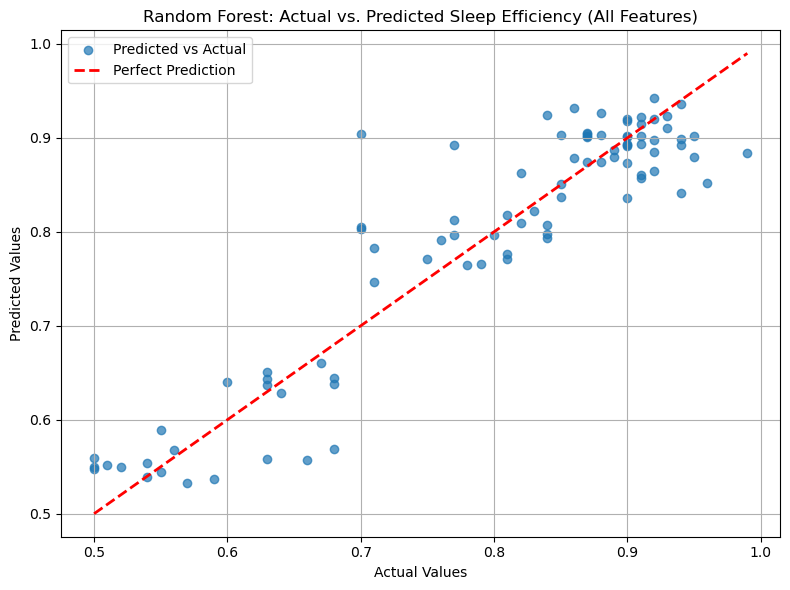

In [70]:
from matplotlib import pyplot as plt

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Random Forest: Actual vs. Predicted Sleep Efficiency (All Features)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig('/home/brandon-ism/Documents/org/courses/c542/project/figs/random_forest_all_features.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Random Forest Selected Features

In [71]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Retain only the selected features and target variable
selected_features = ['Light sleep percentage', 'Awakenings', 'Smoking status', 'Deep sleep percentage']
target_variable = 'Sleep efficiency'

data_selected = df_clean[selected_features + [target_variable]]

# Display basic info and the first few rows
print("Dataset with Selected Features Info:")
data_selected.info()
print("\nFirst few rows of the dataset:")
display(data_selected.head())

Dataset with Selected Features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Light sleep percentage  452 non-null    int64  
 1   Awakenings              452 non-null    float64
 2   Smoking status          452 non-null    int64  
 3   Deep sleep percentage   452 non-null    int64  
 4   Sleep efficiency        452 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 17.8 KB

First few rows of the dataset:


,Light sleep percentage,Awakenings,Smoking status,Deep sleep percentage,Sleep efficiency
0,12,0.0,1,70,0.88
1,53,3.0,1,28,0.66
2,10,1.0,0,70,0.89
3,52,3.0,1,25,0.51
4,18,3.0,0,55,0.76


In [72]:
# Define features (X) and target variable (y)
X = data_selected[selected_features]
y = data_selected[target_variable]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (361, 4)
Testing data shape: (91, 4)


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define RMSE as a custom scoring metric
scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=scorer)

# Convert negative RMSE to positive for interpretability
cv_scores = -cv_scores

# Display CV results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean CV RMSE: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV RMSE: {cv_scores.std():.4f}")


Cross-Validation RMSE Scores: [0.04719814 0.05314432 0.05118372 0.05843073 0.05771425]
Mean CV RMSE: 0.0535
Standard Deviation of CV RMSE: 0.0042


In [74]:
# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model on the test set using RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test Set Root Mean Squared Error (RMSE): {test_rmse:.4f}")


Test Set Root Mean Squared Error (RMSE): 0.0601


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define RMSE as a custom scoring metric
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with RMSE scoring
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring=rmse_scorer,  # Use RMSE as the scoring metric
    cv=5,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {-grid_search.best_score_:.4f}")  # Convert negative RMSE to positive for interpretability

# Evaluate the tuned model on the test set using RMSE
y_pred_best = best_model.predict(X_test)
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Test Set Root Mean Squared Error (Best Model): {test_rmse_best:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best CV RMSE: 0.0521
Test Set Root Mean Squared Error (Best Model): 0.0557


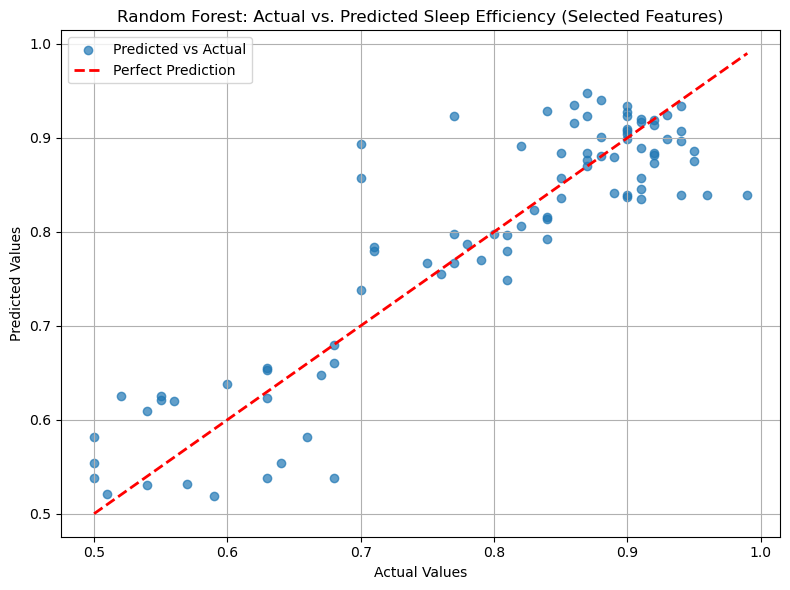

In [76]:
from matplotlib import pyplot as plt

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Random Forest: Actual vs. Predicted Sleep Efficiency (Selected Features)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('/home/brandon-ism/Documents/org/courses/c542/project/figs/random_forest_selected_features.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
